###### Ruiqi Liu
###### CS6220
###### Assignment 2
###### 1/21/2025

### 1. Wine Quality Dataset
#### Loading and Combining the Datasets

In [2]:
# Import necessary libraries
import pandas as pd

# Load datasets from CSV files
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to each DataFrame to indicate wine type
red_wine['wineType'] = 'red'
white_wine['wineType'] = 'white'

# Concatenate the two DataFrames into one combined DataFrame
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

# Display the first few rows of the combined DataFrame to verify
wine_df.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wineType  
0      9.4        5      red  
1      9.8        5      red  
2      9.8        5      red  
3      9.8        6      red  
4      9.4        5      red

#### 1.1 Summary Statistics

In [3]:
# Compute summary statistics for the combined dataset
summary_stats = wine_df.describe()

# Calculate additional statistics: range, variance
# Range = max - min for each numeric feature
range_values = wine_df.max(numeric_only=True) - wine_df.min(numeric_only=True)
variance_values = wine_df.var(numeric_only=True)

# Display summary statistics
print("Summary Statistics:\n", summary_stats)
print("\nRange for each feature:\n", range_values)
print("\nVariance for each feature (recomputed):\n", variance_values)


Summary Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000         

#### 1.2 Data Visualization

##### Histograms

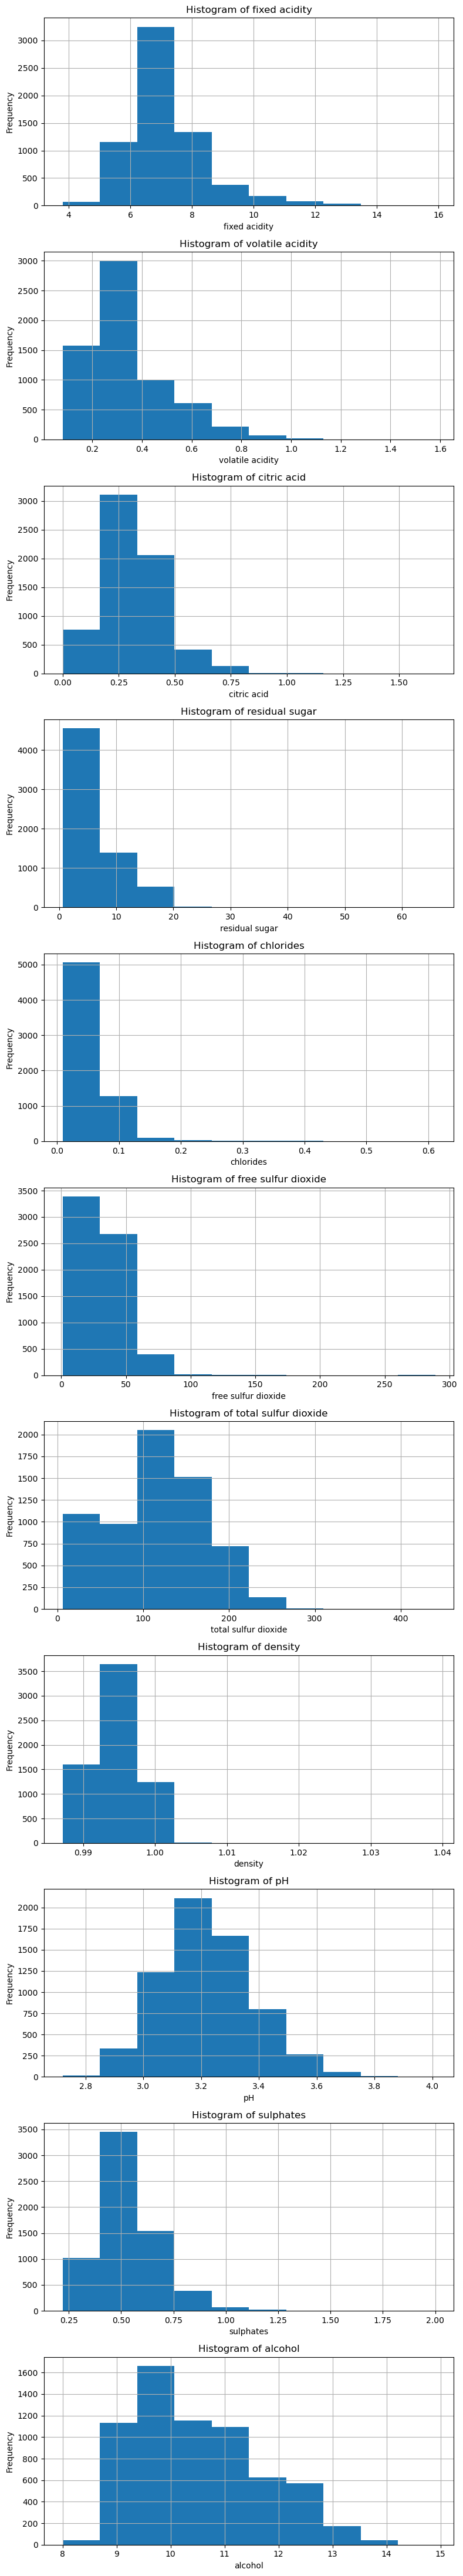

In [4]:
import matplotlib.pyplot as plt

# List of numeric feature columns excluding 'wineType' and 'quality'
features = wine_df.select_dtypes(include=['float64', 'int64']).columns.drop('quality')

# Set up a figure with subplots for each feature histogram
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 4*len(features)))
for ax, feature in zip(axes, features):
    wine_df[feature].hist(ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


##### Box Plots

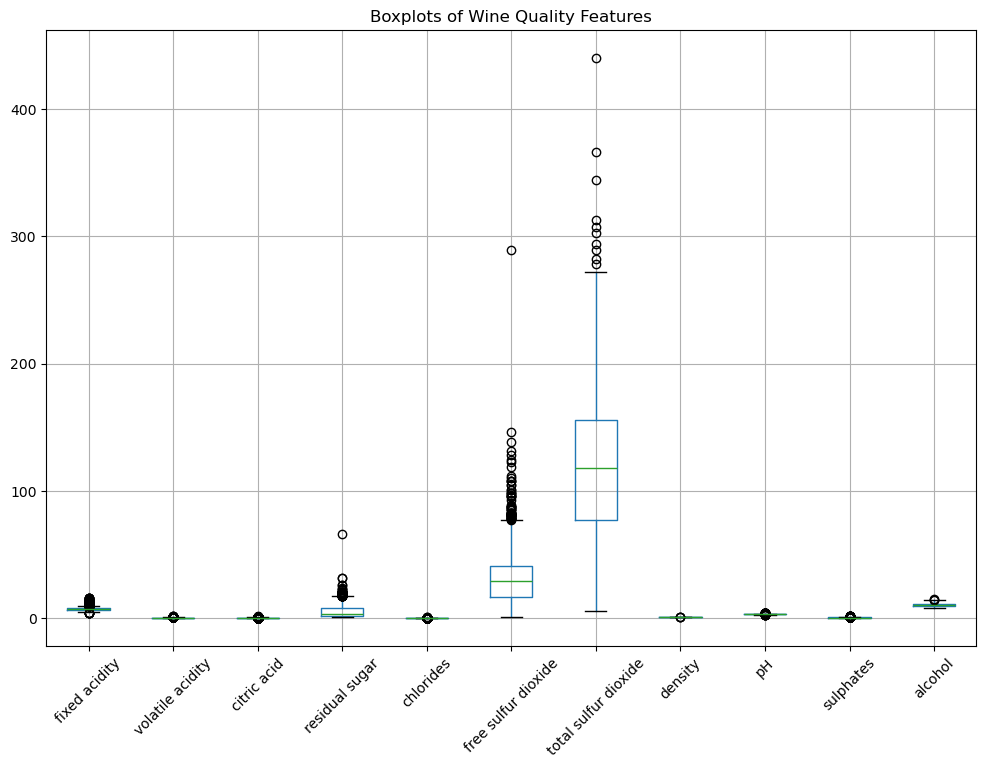

In [8]:
# Create a boxplot for each numeric feature on a single plot
plt.figure(figsize=(12, 8))

# Convert features index to list if needed
feature_list = list(features)

wine_df.boxplot(column=feature_list)
plt.title("Boxplots of Wine Quality Features")
plt.xticks(rotation=45)
plt.show()


##### Pairwise Plots

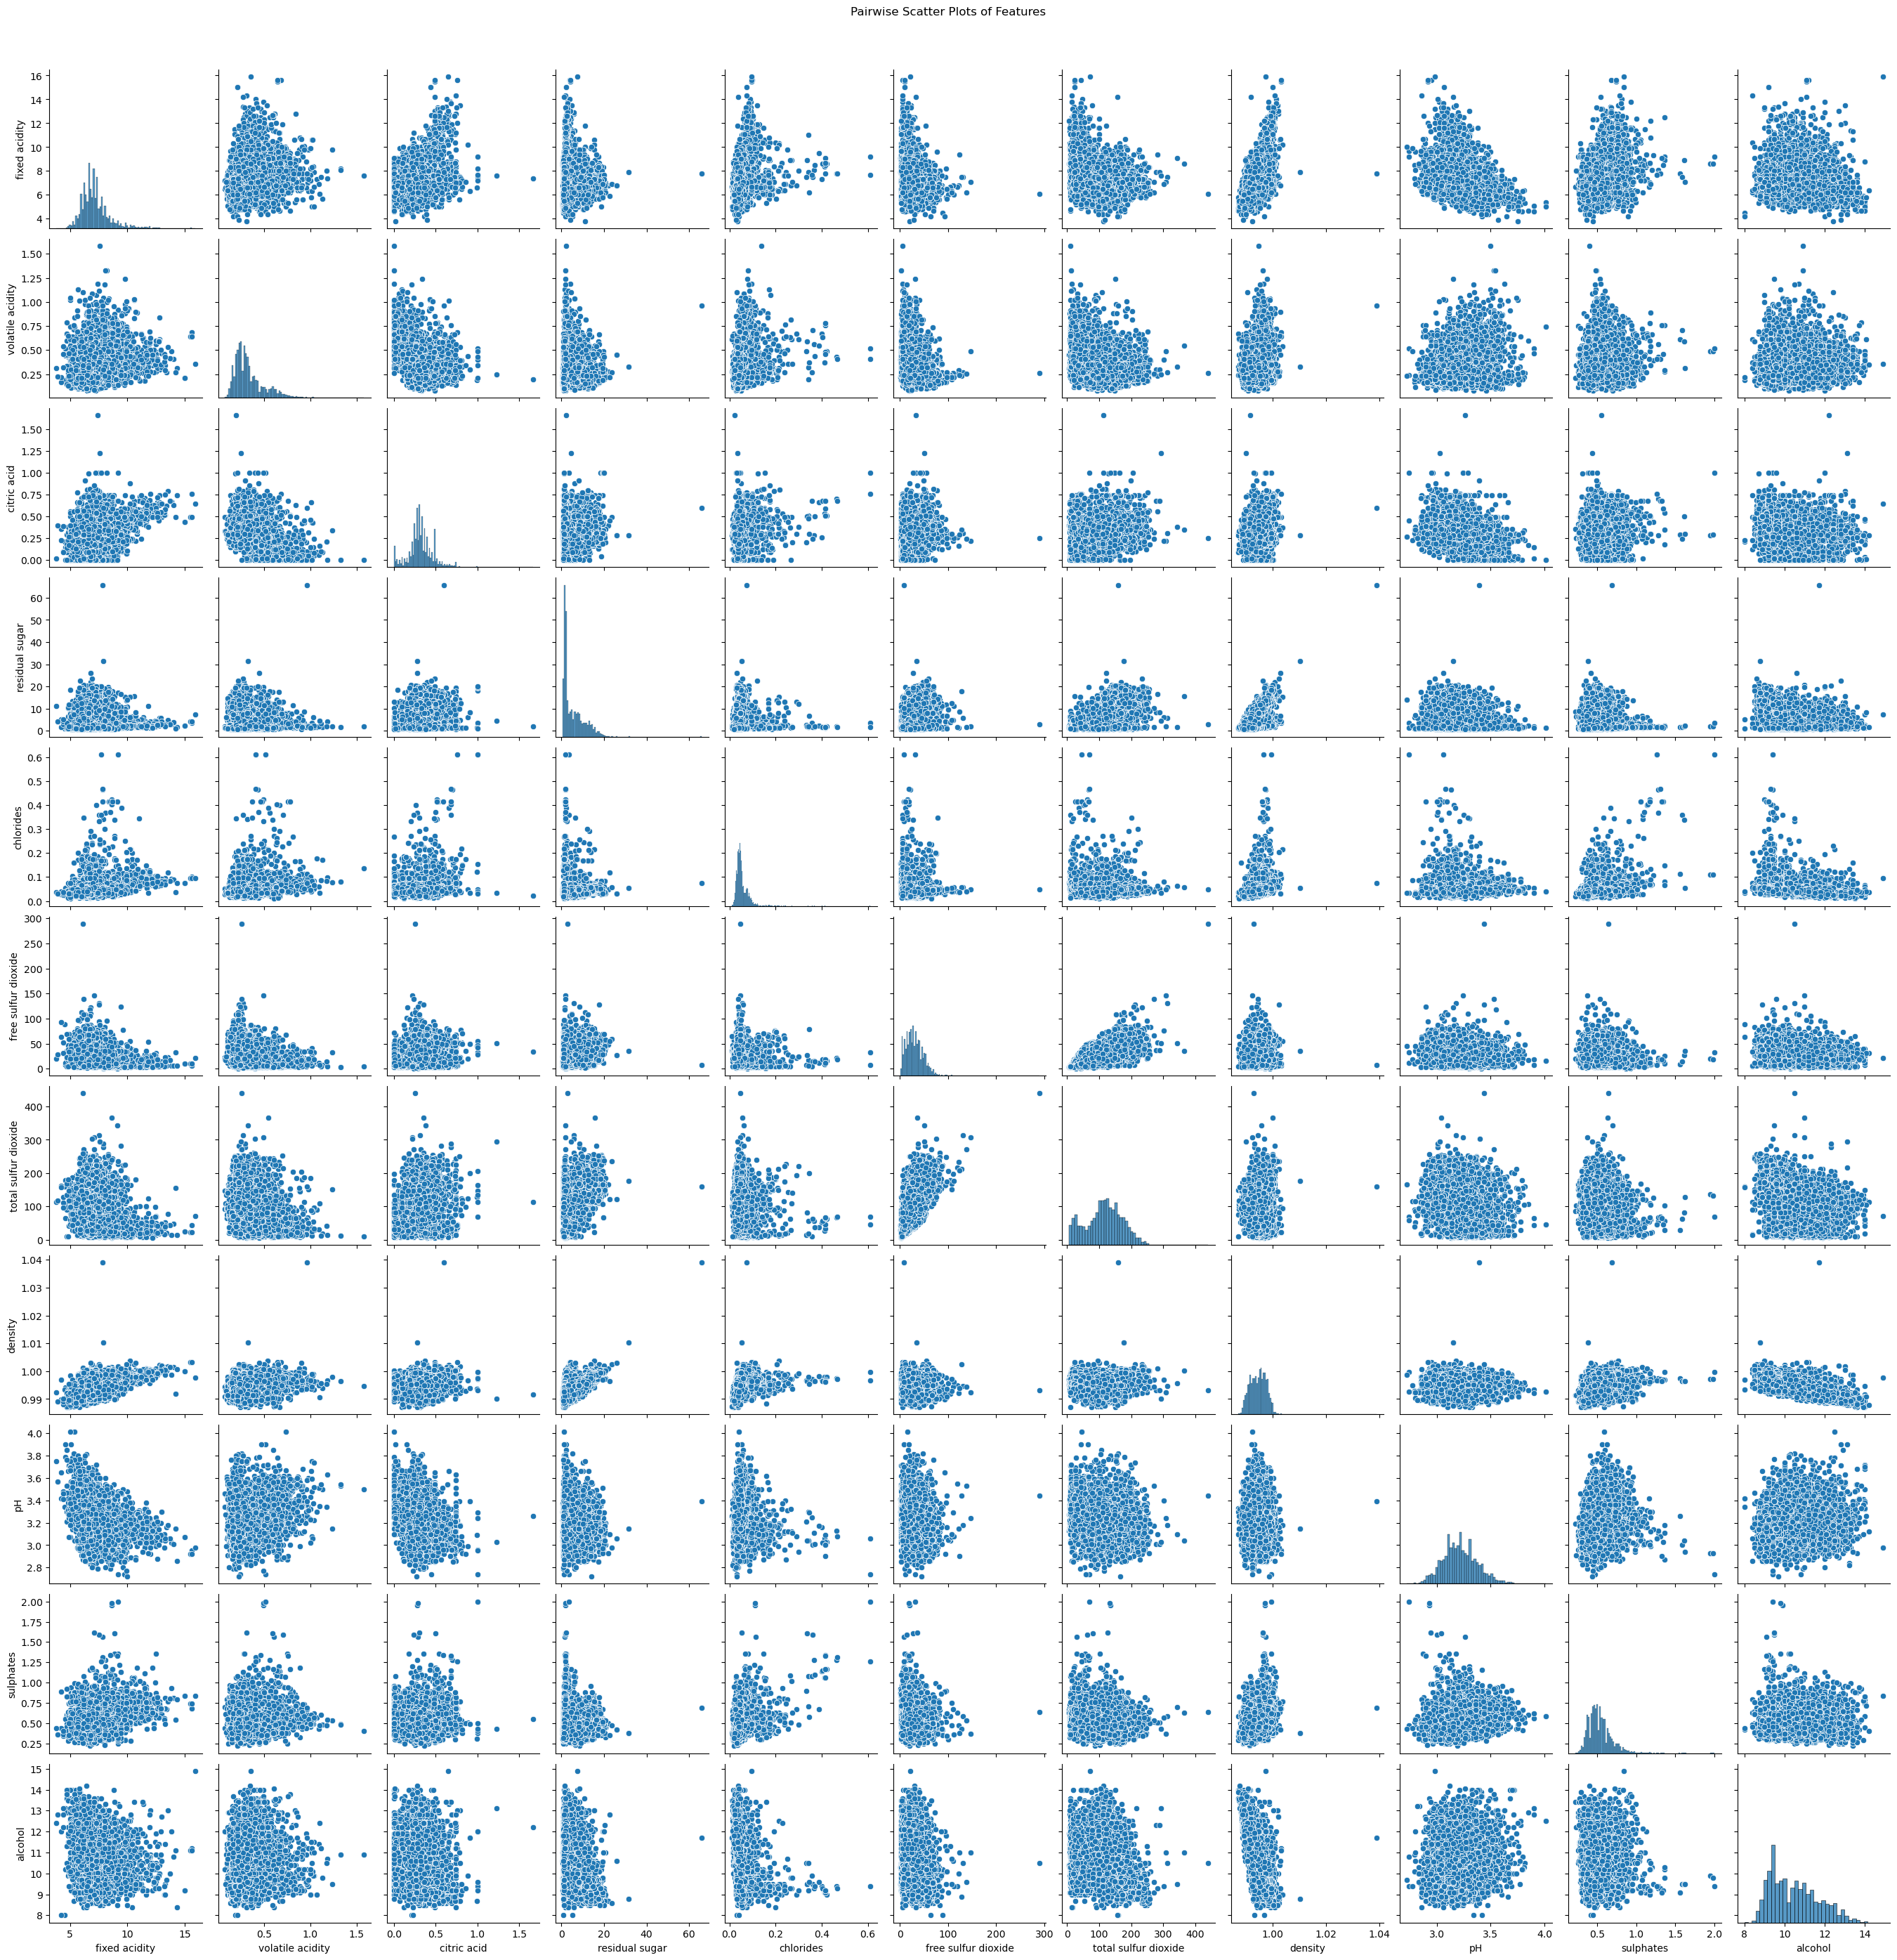

In [9]:
import seaborn as sns

# Create pairwise scatter plots for each pair of features
sns.pairplot(wine_df[features])
plt.suptitle("Pairwise Scatter Plots of Features", y=1.02)
plt.show()


##### Class-wise Visualization

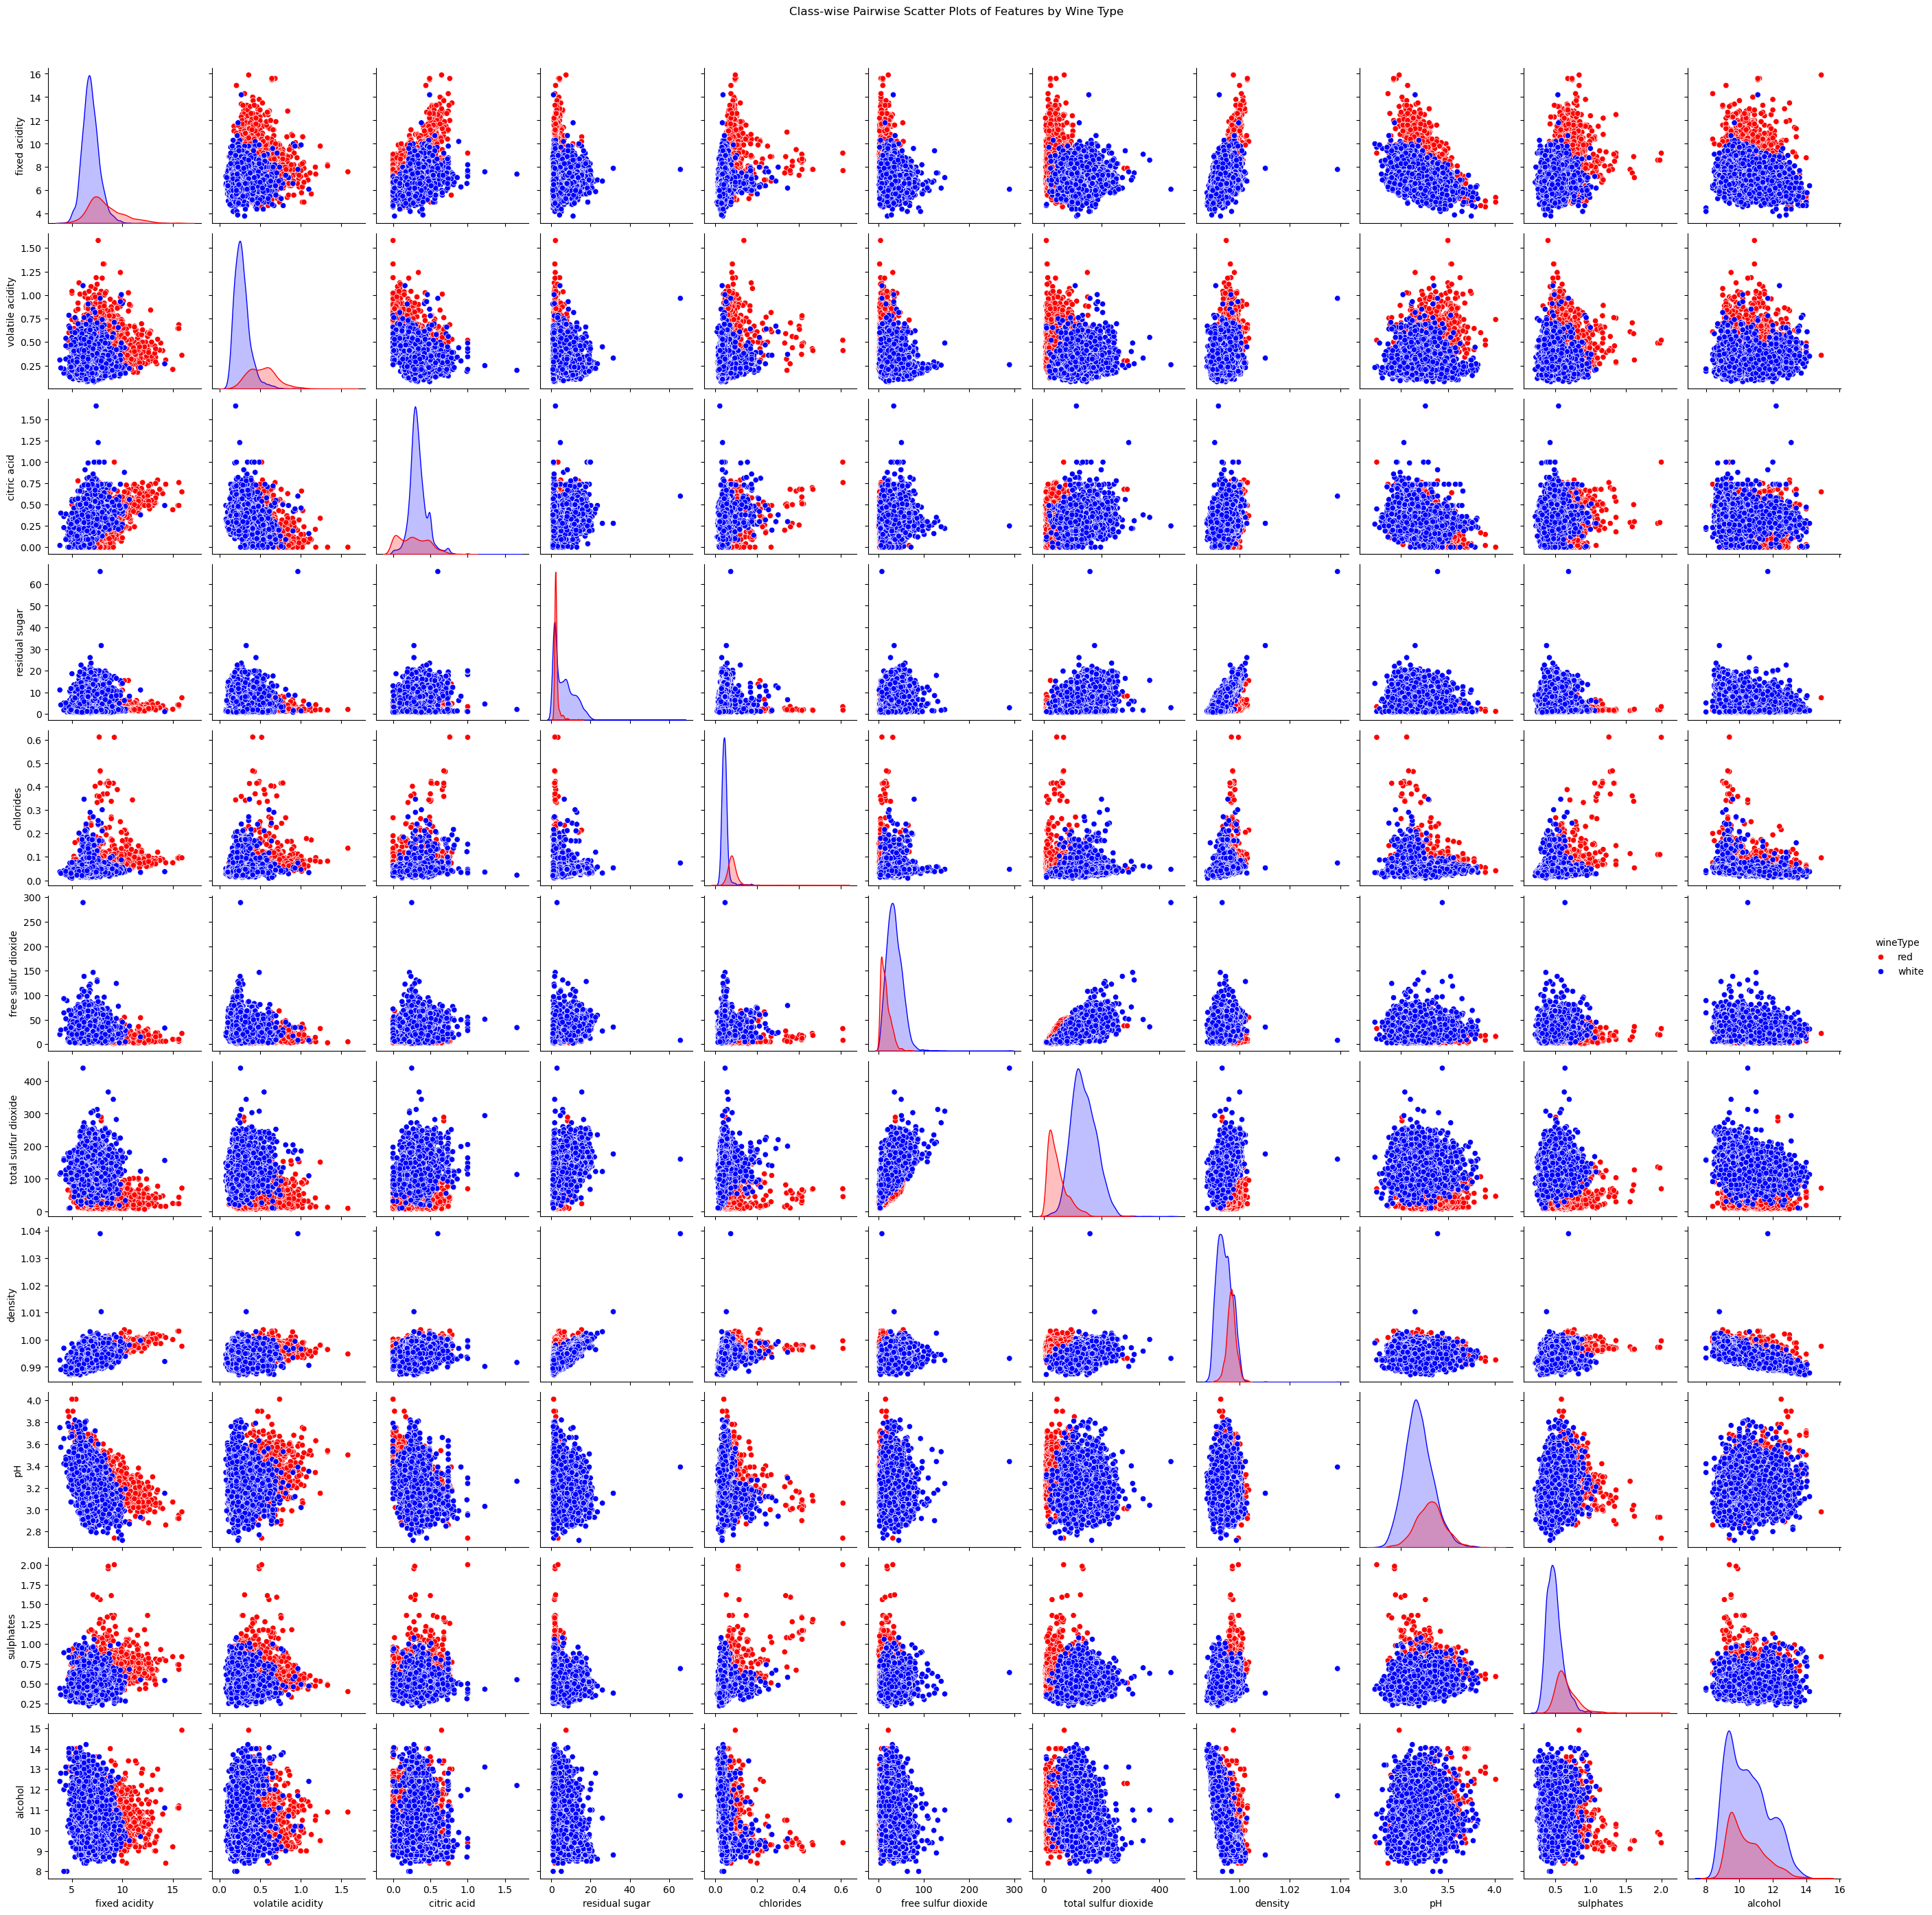

In [10]:
# Create pairwise scatter plots separated by wine type
sns.pairplot(wine_df, vars=features, hue='wineType', palette={'red':'red', 'white':'blue'})
plt.suptitle("Class-wise Pairwise Scatter Plots of Features by Wine Type", y=1.02)
plt.show()


#### **1.3 Conceptual Questions**

##### **1. How many features are there? What are the types of the features (e.g., numeric, nominal, discrete, continuous)?**
The dataset consists of **12 features** and 1 categorical column (`wineType`). The feature types are as follows:

- **Numeric (Continuous) Features:**
  - `fixed acidity`
  - `volatile acidity`
  - `citric acid`
  - `residual sugar`
  - `chlorides`
  - `free sulfur dioxide`
  - `total sulfur dioxide`
  - `density`
  - `pH`
  - `sulphates`
  - `alcohol`

- **Discrete Feature:**
  - `quality` (integer values from 0 to 10)

- **Categorical Feature:**
  - `wineType` (`red` or `white`)

##### **2. What can you conclude from the histograms about the distribution of the features in the dataset?**
- Most features **do not follow a normal distribution**. Instead, they tend to be **skewed**.
- Features such as **alcohol** and **pH** exhibit a more **bell-shaped** distribution, though not perfectly normal.
- **Highly skewed features:**
  - `residual sugar`, `chlorides`, `free sulfur dioxide`, and `total sulfur dioxide` have a **right-skewed distribution**.
  - **Fixed acidity** appears to be **left-skewed** rather than normally distributed.
  - This suggests that most wines have low values for these features, with a few extreme values.

##### **3. Based on the box plots, are there any features that appear to have many outliers?**
- Features with **many outliers:**
  - `free sulfur dioxide`
  - `total sulfur dioxide`
  - `residual sugar`
  - `chlorides`
  - **Fixed acidity** also has **a moderate number of outliers**.
- These features have several **data points beyond the upper whiskers**, indicating extreme values in the dataset.
- Features like `pH` and `density` have **fewer outliers**.

###### **Do any features have a similar spread of values across different quality ratings?**
- `density` and `pH` have **similar spreads** across different wine qualities, indicating they may not vary significantly with quality.

###### **Do any features have different spreads across different quality ratings?**
- **Alcohol and sulphates:** These features **spread more widely** across different quality ratings, suggesting they might be important indicators of wine quality.

##### **4. Based on the pairwise plots, which features appear to be highly correlated?**
- Strong **positive correlations**:
  - `free sulfur dioxide` and `total sulfur dioxide` (as expected since one is a subset of the other).
  - `fixed acidity` and `citric acid`.
  - **Fixed acidity and density** show a **moderate correlation**.
- **Negative correlations:**
  - `density` and `alcohol` (denser wines tend to have lower alcohol content).
- **Features that do not show strong correlations:**
  - `pH` does not correlate strongly with any other feature.
  - `quality` does not have a **clear linear correlation** with most features but shows some influence from `alcohol` and `sulphates`.

##### **5. Based on the class-wise visualizations, are there any pairs of features that appear to be more correlated for certain wine types than for others?**
- **Red vs. White Wine Differences:**
  - `total sulfur dioxide` and `free sulfur dioxide` are **more correlated in white wines** than in red wines.
  - `alcohol` and `sulphates` show **a stronger correlation in red wines**.
  - `density` vs. `residual sugar` shows a **higher correlation in white wines**, likely due to their higher sugar content.

These insights indicate that the relationships between features can vary based on wine type, which might be useful for classification or predictive modeling.



### 2. Forest Fires Dataset

#### Loading the Dataset

In [11]:
import pandas as pd

# Load the Forest Fires dataset from the CSV file
fires_df = pd.read_csv('forestfires.csv')

# Display the first few rows of the dataset to verify loading
fires_df.head()


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

#### 2.1 Summary Statistics

In [12]:
# Compute summary statistics for the Forest Fires dataset
fires_summary = fires_df.describe()

# Calculate additional statistics: range, variance
# Range = max - min for each numeric feature
fires_range = fires_df.max(numeric_only=True) - fires_df.min(numeric_only=True)
fires_variance = fires_df.var(numeric_only=True)

# Display summary statistics
print("Summary Statistics:\n", fires_summary)
print("\nRange for each feature:\n", fires_range)
print("\nVariance for each feature (recomputed):\n", fires_variance)


Summary Statistics:
                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653 

#### 2.2 Data Visualization

##### Histograms

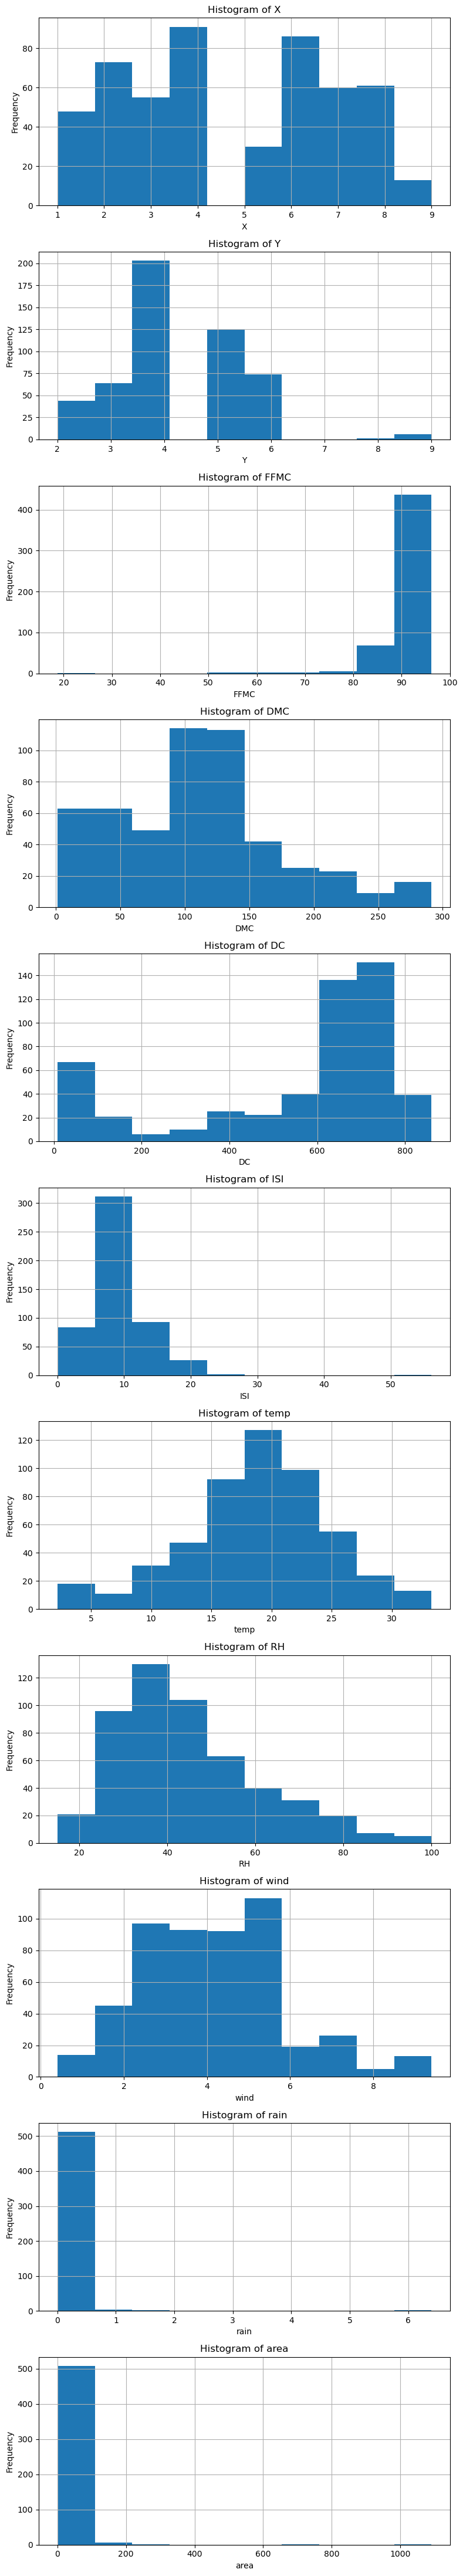

In [13]:
import matplotlib.pyplot as plt

# List of numeric feature columns, excluding non-numeric if necessary
numeric_features = fires_df.select_dtypes(include=['float64', 'int64']).columns

# Set up a figure with subplots for each feature histogram
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(8, 4*len(numeric_features)))
for ax, feature in zip(axes, numeric_features):
    fires_df[feature].hist(ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


##### Boxplots

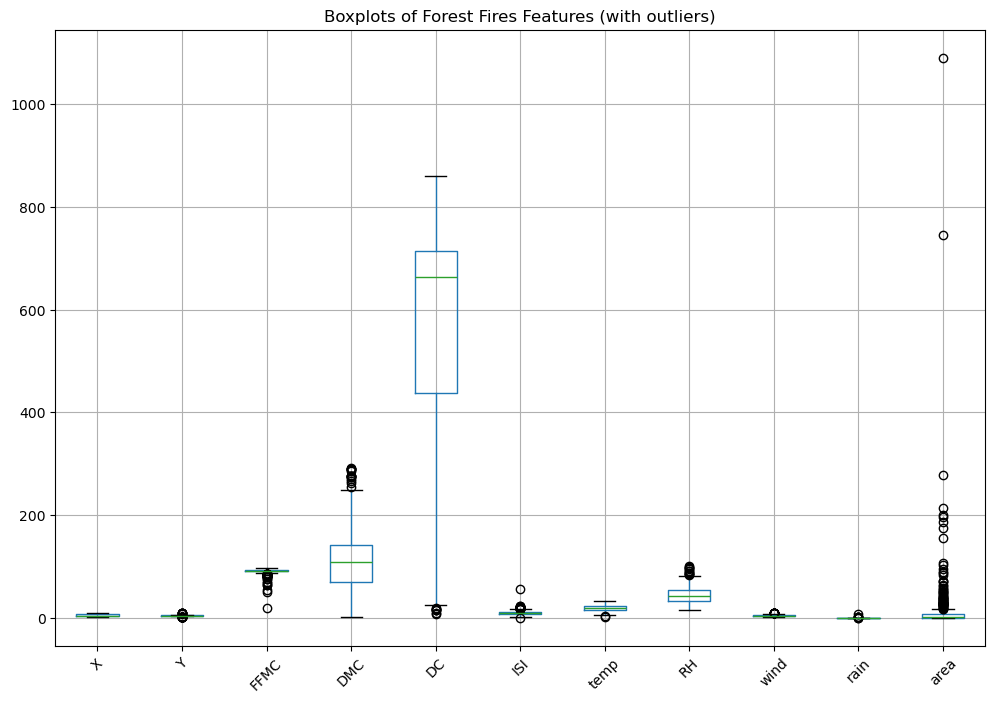

In [14]:
# Boxplot including outliers
plt.figure(figsize=(12, 8))
fires_df.boxplot(column=list(numeric_features))
plt.title("Boxplots of Forest Fires Features (with outliers)")
plt.xticks(rotation=45)
plt.show()


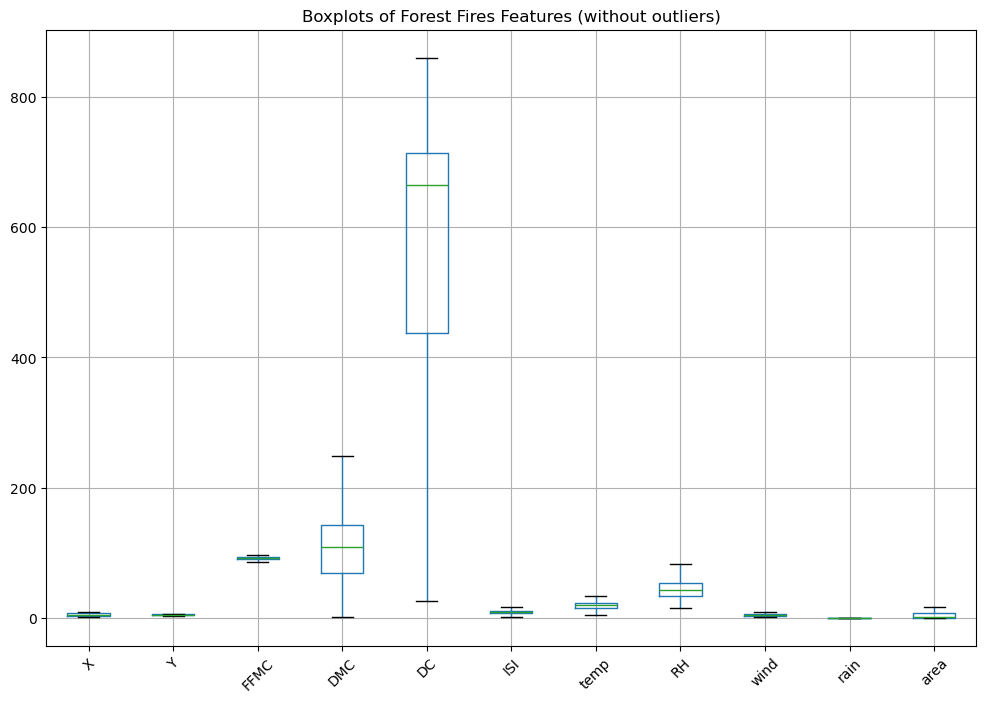

In [15]:
# Boxplot excluding outliers using showfliers=False
plt.figure(figsize=(12, 8))
fires_df.boxplot(column=list(numeric_features), showfliers=False)
plt.title("Boxplots of Forest Fires Features (without outliers)")
plt.xticks(rotation=45)
plt.show()


### **2.3 Conceptual Questions**

#### **1. From the boxplot without outliers, which features have a significantly different distribution from others? Why?**
- **Features with significantly different distributions:**
  - **DC (Drought Code)**: Has a much higher median and spread compared to other features.
  - **DMC (Duff Moisture Code)**: Shows a large interquartile range, meaning a wide distribution.
  - **RH (Relative Humidity)**: Displays more variability compared to features like FFMC and ISI.
  - **area (Burned Area)**: Originally has extreme outliers, and even after removal, it remains highly skewed.

- **Reason:**  
  - These features differ because their scales and variations are much larger than others.
  - For example, **DC and DMC are cumulative indices**, meaning they tend to accumulate values over time, leading to large numbers.
  - The **area variable is highly skewed** due to extreme fire sizes, which results in a very long tail in its distribution.

---

#### **2. What does the outlier in the features mean? If you remove the outliers from the dataset, what problems might arise?**
- **Outliers in the dataset represent extreme or rare conditions**, such as:
  - **Extreme fire sizes (area)** due to prolonged dry conditions.
  - **Rare but high wind speeds, humidity levels, or rain amounts** that could influence fire behavior.

- **Problems that might arise from removing outliers:**
  - **Loss of critical information:** Extreme fire cases are important for predictive modeling, as they represent high-risk scenarios.
  - **Bias in analysis:** If the dataset is trimmed too much, we might lose real data points that contribute to understanding fire severity.
  - **Reduced model accuracy:** If a model is trained without outliers, it may fail to predict extreme events correctly.

---

#### **3. Create a histogram for only FFMC after removing all the values outside of range [88, 96].**

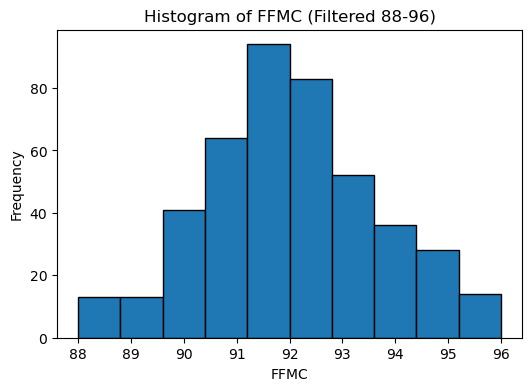

In [16]:
# Filter FFMC values within the range [88, 96]
filtered_ffmc = fires_df[(fires_df['FFMC'] >= 88) & (fires_df['FFMC'] <= 96)]['FFMC']

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(filtered_ffmc, bins=10, edgecolor='black')
plt.title("Histogram of FFMC (Filtered 88-96)")
plt.xlabel("FFMC")
plt.ylabel("Frequency")
plt.show()


---

#### **4. What distribution does the new histogram follow?**
- **The filtered FFMC histogram likely follows a right-skewed distribution (positive skew).**

- **The majority of values are concentrated towards the higher end (above 90), which indicates that FFMC tends to be high in most cases.**

- **This suggests that most fire-prone days have a high FFMC value, which aligns with the expectation that dry conditions increase fire risk.**
